In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path='Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/test'
data_val_path='Fruits_Vegetables/validation'

In [4]:
img_width=180
img_height=180

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 837 files belonging to 10 classes.


In [6]:
cat=data_train.class_names

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 20 files belonging to 2 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 29 files belonging to 3 classes.


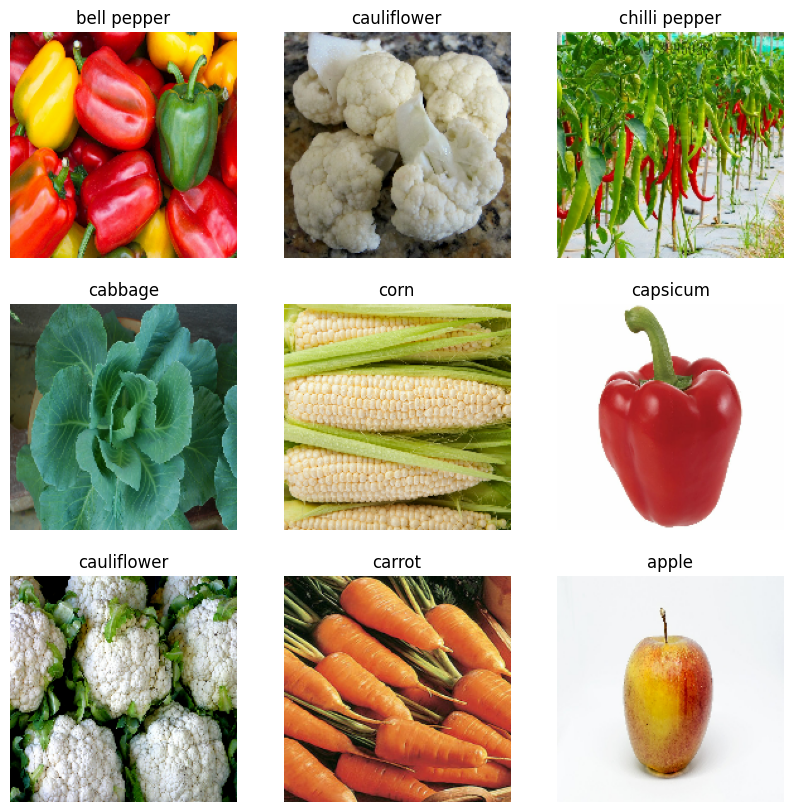

In [9]:
plt.figure(figsize=(10,10))
for images,labels in data_train.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(cat[labels[i]])
        plt.axis("off")

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0,2),
    layers.Dense(128),
    layers.Dense(units=len(cat))

])

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
epochs=20
history=model.fit(data_train,epochs=epochs,batch_size=32)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - accuracy: 0.1250 - loss: 3.1301
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.3037 - loss: 1.9204
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.5488 - loss: 1.4245
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.6410 - loss: 1.1383
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.8135 - loss: 0.6674
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.8602 - loss: 0.4166
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.9555 - loss: 0.1837
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.9624 - loss: 0.1393
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.9806 - loss: 0.1061
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.9834 - loss: 0.0844
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9866 - loss: 0.0662
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/ste

In [14]:
image='apple.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [15]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [16]:
score=tf.nn.softmax(predict)

In [17]:
score

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[4.8664401e-04, 3.4857131e-08, 8.6073476e-01, 2.9524827e-02,
        3.8598814e-06, 1.6885459e-02, 2.3048055e-06, 4.4761309e-03,
        6.6947907e-02, 2.0938108e-02]], dtype=float32)>

In [18]:
# Convert the tensor to a NumPy array
score_np = score.numpy()

# Get the maximum score
max_score = np.max(score_np)

# Convert the score to percentage
accuracy_percentage = max_score * 100

# Print the accuracy in the desired format
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 86.07%


In [19]:
cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn']

In [20]:
model.save('Image_classify.keras')